# Density Plots


**Normal Distribution**

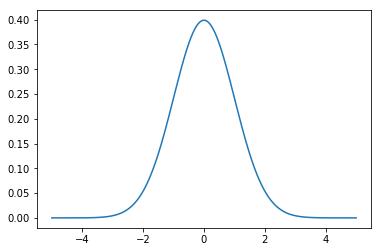

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-5,5,5000)

def normal_density(mu,sigma,x):
    f = (1/(sigma*(2*math.pi)**0.5)*math.e**(-0.5*((x-mu)/sigma)**2))
    return f
plt.figure()
plt.plot(x,normal_density(0,1,x))
plt.show()

**Normal Distribution: Joint Density**

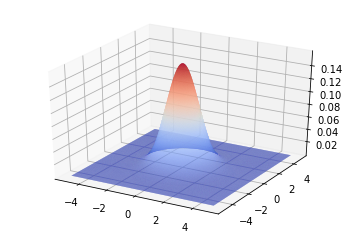

In [3]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

X=np.linspace(-5,5,500)
Y=np.linspace(-5,5,500)
X, Y = np.meshgrid(X, Y)

def normal_joint_density(mux,sigmax,x,muy,sigmay,y,p):
    f = (1/(2*math.pi*sigmax*sigmay*(1-p**2)**0.5))*math.e**(-0.5*(1/(1-p**2))*(((x-mux)/sigmax)**2 - 2*p*((x-mux)/sigmax)*((y-muy)/sigmay) + ((y - muy)/sigmay)**2))
    return f   


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X=X, Y=Y, Z=normal_joint_density(0,1,X,0,1,Y,0), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)  

plt.show()

# Brownian Motion Paths

Text(0.5,0,'time')

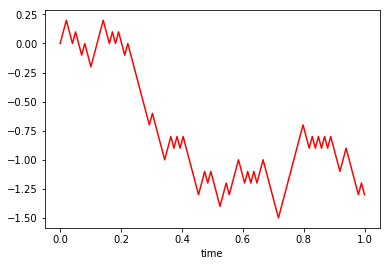

In [14]:
#Brownian Motion simulation
import matplotlib.pyplot as plt

t = 1
n = 100


def brownian(t,n):
    Bs = np.zeros(n)
    ds = t/n
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1]+ sign*np.sqrt(ds)
    return Bs

x = np.linspace(0,1,n)


plt.plot(x, brownian(1,100),color = 'red')
plt.xlabel('time')


# Squared Brownian Motion

Lognormal Distribtution


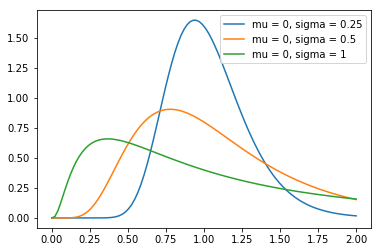

Gamma Approximation & Lognormal Approximation
t= 1.5


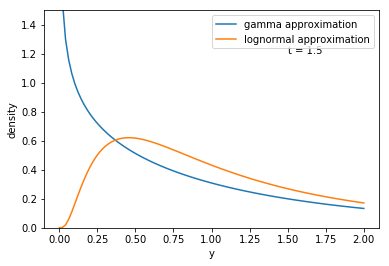

In [15]:
import numpy as np
import time
from scipy.stats import gamma
from matplotlib import pyplot as plt
import math
from scipy.stats import lognorm

def lognormpdf(x,mu,sigma):
    t=1.5
    f = (1/(x*sigma*math.sqrt(2*math.pi))) * math.e**(-(math.log(x)-mu)**2/(2*sigma**2))
    return f

lognormpdf = np.vectorize(lognormpdf)


x = np.linspace(0.001,2,100)
t = 1.5
alpha = 2*t**2/3
beta = 3/4
sigma = math.sqrt(math.log(7/3))
mu = -0.5*(math.log(7/3))**0.5 + math.log(t**4/3)

print("Lognormal Distribtution")

plt.figure()

plt.plot(x,lognormpdf(x,0,0.25),label = "mu = 0, sigma = 0.25")
plt.plot(x,lognormpdf(x,0,0.5),label = "mu = 0, sigma = 0.5")
plt.plot(x,lognormpdf(x,0,1),label = "mu = 0, sigma = 1")
plt.legend()
plt.show()



print("Gamma Approximation & Lognormal Approximation")

print("t=",t)

plt.figure()

plt.plot(x, gamma.pdf(x,beta,0,alpha),label = 'gamma approximation')
plt.plot(x,lognormpdf(x,mu,sigma), label = 'lognormal approximation')
plt.legend()
plt.xlabel('y')
plt.ylabel('density')
plt.ylim(0,1.5)
plt.text(1.5,1.2,"t = 1.5")
plt.show()



Monte Carlo Simulation

time = 43.161948919296265
Ex =  1.1127394499999996
Var =  1.6296643439106968
KstestResult(statistic=0.5035693120934585, pvalue=0.0)
KstestResult(statistic=0.207822482058028, pvalue=0.0)
t = 1.5


<IPython.core.display.Javascript object>


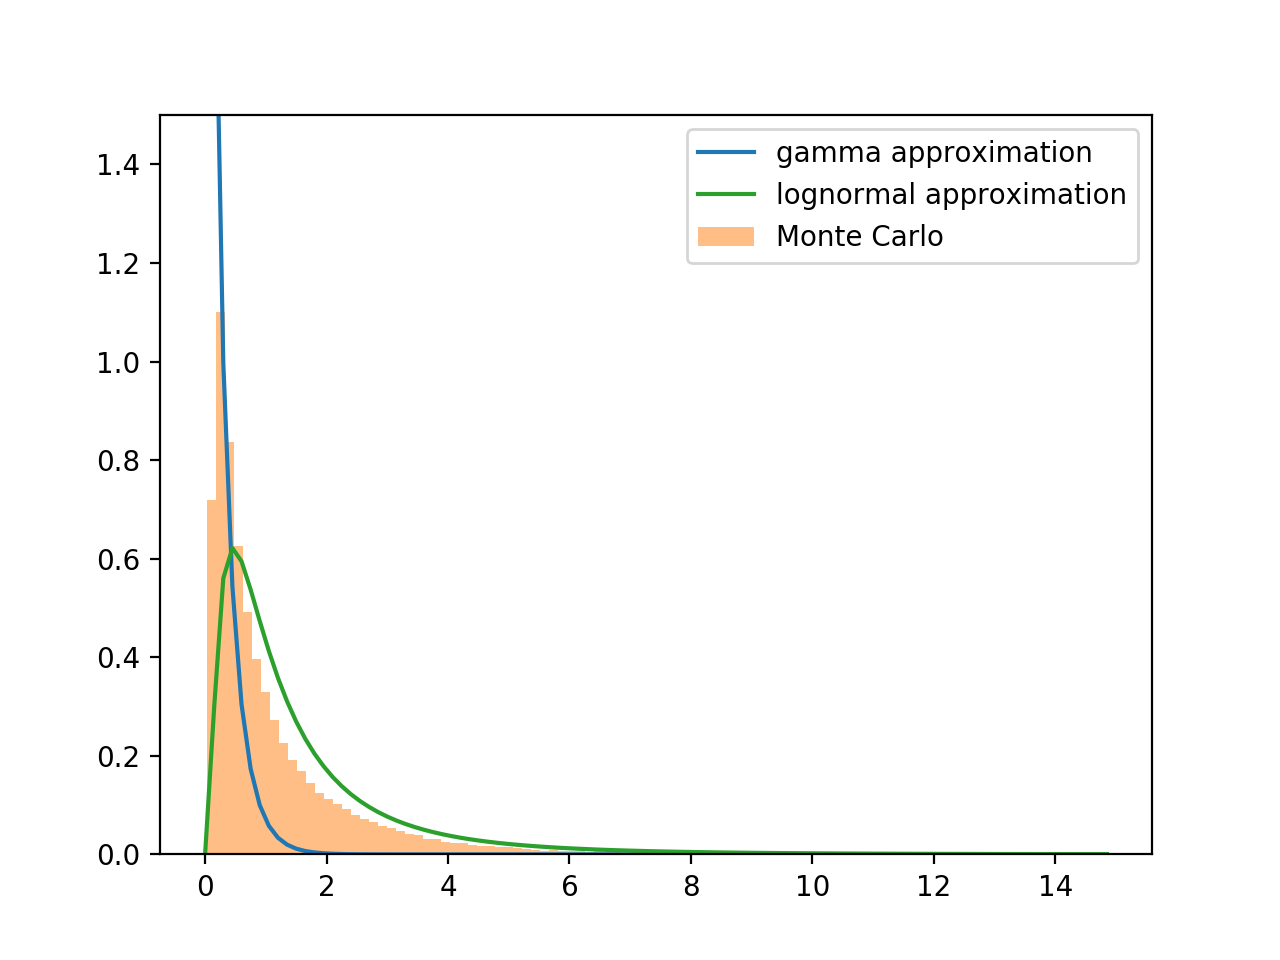

(0, 1.5)

In [22]:

import numpy as np
import time
from scipy.stats import gamma
from scipy.stats import kstest
from matplotlib import pyplot as plt

t = 1.5
n = 100
trials = 60000
points = 100
p1 = np.zeros([trials])
A = np.zeros([trials])

def brownsum(t,n):
    Bs = np.zeros(n)
    ds = t/n
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1] + sign*np.sqrt(ds)
    p1 = np.dot(Bs,Bs.T)*ds
    #print(Bs)
    return Bs, p1

start = time.time()

for i in range(trials):
    #A[i] = brownsum(t,n)[0][n-1]
    #_ , p1[i] = brownsum(t,n)
    p1[i] = brownsum(t,n)[1]
    
end = time.time()

print('time =',end-start)

xmin = 0.0001
xmax = max(p1)
x = np.linspace(xmin,xmax,points)

print("Ex = ", np.mean(p1))
print("Var = ", np.var(p1))

beta = 3/4
alpha = 2/(3*t**2)

sigma = (math.log(7/3))**0.5
mu = -0.5*(math.log(7/3))**0.5 + math.log(t**4/3)


ks = kstest(p1,"gamma",args = (beta,0,alpha))
print(ks)
ks2 = kstest(p1,"lognorm",args=(sigma,0,math.e**mu))
print(ks2)

print("t =",t)
plt.figure()
plt.plot(x,gamma.pdf(x,beta,0,alpha),label = 'gamma approximation')
k1 =plt.hist(p1, density = True, histtype = 'stepfilled', alpha = 0.5, bins = points,label = 'Monte Carlo')
plt.plot(x,lognormpdf(x,mu,sigma), label = 'lognormal approximation')
plt.legend()
plt.ylim(0,1.5)




# Squared Brownian Bridge

Gamma and Lognormal Approximation: Square Brownian Bridge
t= 1.5 a= 0.5


<IPython.core.display.Javascript object>


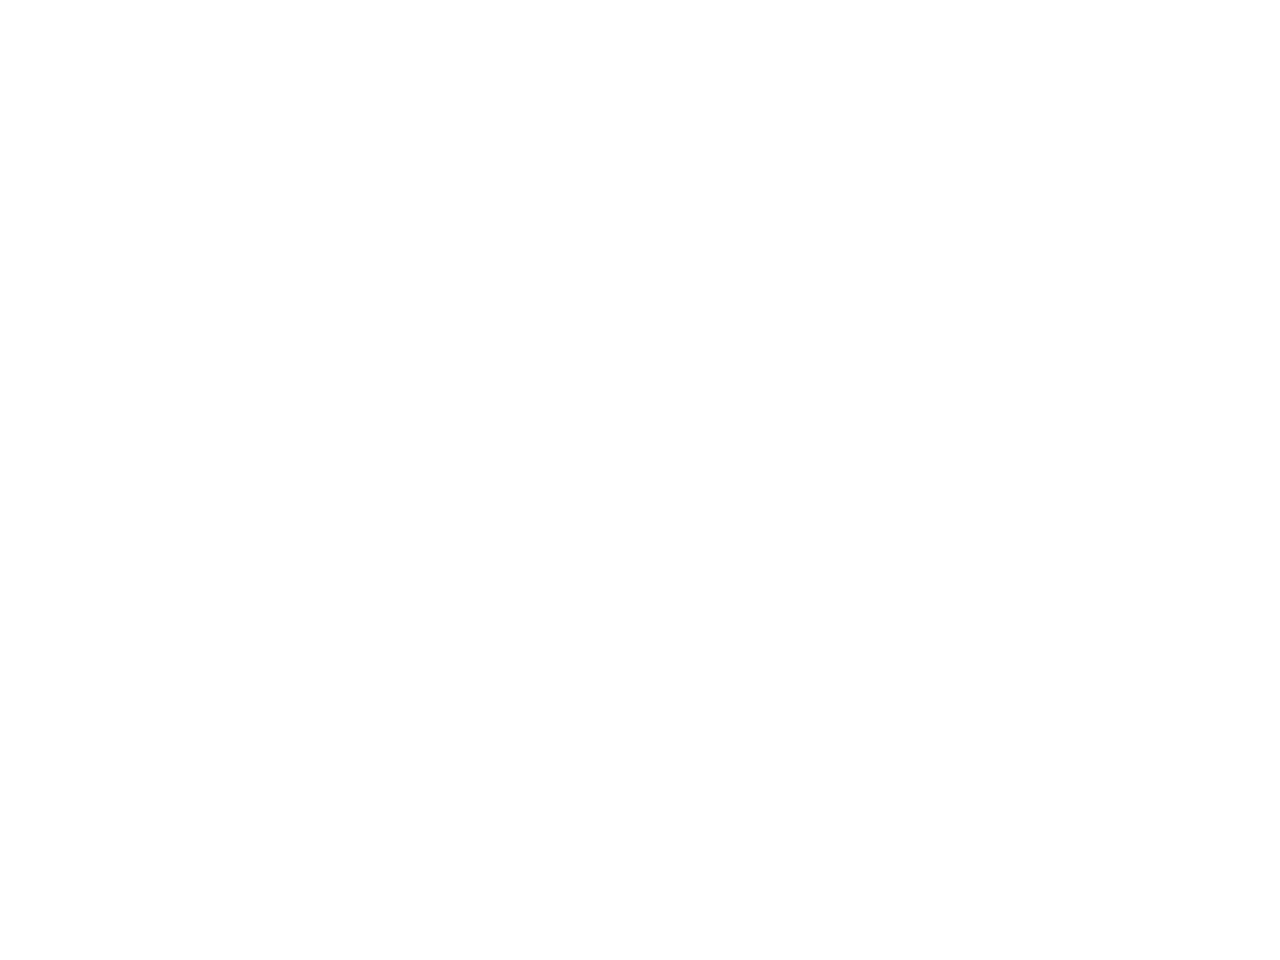

In [24]:
y = np.linspace(0,2,70)
t = 1.5
a = 0.5

from scipy.stats import lognorm
from scipy.stats import gamma

beta = (5/4) + (5*a**4)/(4*a**2*t + t**2)
alpha = (2/15)*(t**2*(t + 4*a**2)/(t + 2*a**2))
ex = (t*a**2/3) + ((t**2)/6)
var = (4*(a**2)*t**3 + t**4)
sigma = (math.log(1 + var/(ex**2)))**0.5
mu = -0.5*sigma**2 + math.log(var)

print("Gamma and Lognormal Approximation: Square Brownian Bridge")

print("t=",t,"a=",a)

plt.figure()
plt.plot(y,gamma.pdf(y,beta,0,alpha),label = 'gamma approximation')
plt.plot(y,lognorm.pdf(y,sigma,0,math.e**mu), label = 'lognormal approximation')
plt.legend()
plt.text(3.6,0.4,'t = 1.5, a = 1.5')

plt.xlabel('y')
plt.ylabel('density')
plt.show()


Monte Carlo Simulation

time = 52.72784209251404
mean: 0.4946982189221495
var: 0.17937644888870352
KstestResult(statistic=0.23855101043739746, pvalue=0.0)
KstestResult(statistic=0.27158698072327303, pvalue=0.0)
t= 1.5 a= 0.5


<IPython.core.display.Javascript object>


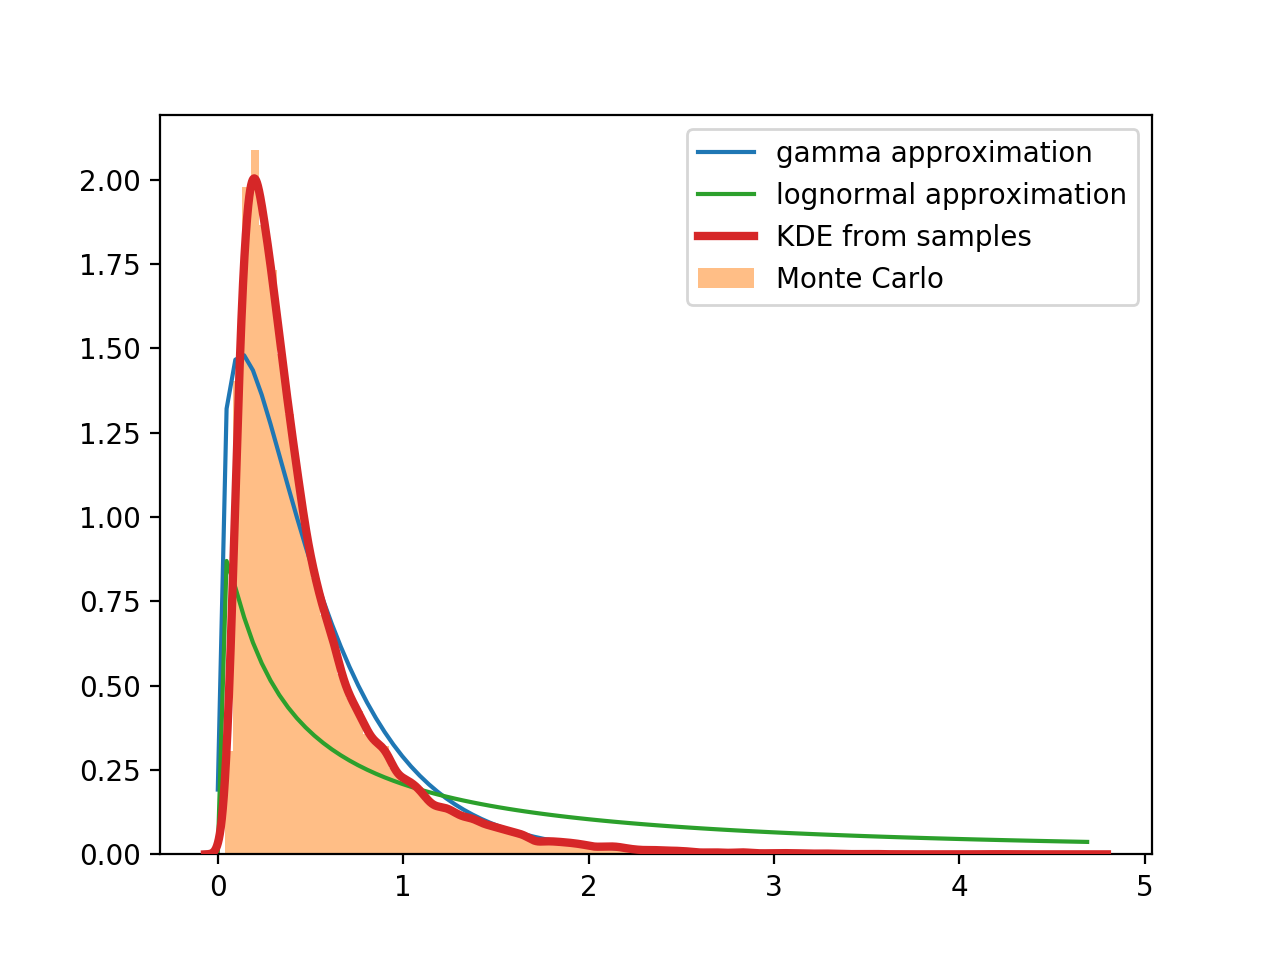

In [26]:
%matplotlib notebook
from scipy.stats import gamma, lognorm
import math
import statsmodels.api as sm

t = 1.5
a = 0.5
n = 100
trials = 60000
points = 100
p = np.zeros(trials)
A = np.zeros([trials])


def squarebrownbridge(t,a,n):
    Bs = np.zeros(n)
    Bt = np.zeros(n)
    ds = t/n
    
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1] + sign*np.sqrt(ds)
    
    for i in range(1,n):
        Bt[i] = Bs[i] - (i+1)/n*Bs[n-1] + a*(i+1)/n
        p = np.dot(Bt,Bt.T)*ds
    return Bt, p

start = time.time()

for i in range(trials):
    #A[i] = brownsum(t,n)[0][n-1]
    p[i] = squarebrownbridge(t,a,n)[1]
    
end = time.time()

print('time =',end-start)
    
ymin = 0.0001
ymax = max(p)
y = np.linspace(ymin,ymax,points)


print("mean:",np.mean(p))
print("var:",np.var(p))

beta = (5/4) + (5*a**4)/(4*a**2*t + t**2)
alpha = (2/15)*(t**2*(t + 4*a**2)/(t + 2*a**2))

ex = (t*a**2/3) + ((t**2)/6)
var = (4*(a**2)*t**3 + t**4)
sigma = (math.log(1 + var/(ex**2)))**0.5
mu = -0.5*sigma**2 + math.log(var)

ks = kstest(p1,"gamma",args = (beta,0,alpha))
print(ks)
ks2 = kstest(p1,"lognorm",args=(sigma,0,math.e**mu))
print(ks2)

print("t=",t,"a=",a)

plt.figure()
plt.plot(y,gamma.pdf(y,beta,0,alpha),label = "gamma approximation")
k2 = plt.hist(p,density=True,histtype = 'stepfilled', alpha = 0.5, bins = points,label="Monte Carlo")
plt.plot(y,lognormpdf(y,mu,sigma),label="lognormal approximation")

kde = sm.nonparametric.KDEUnivariate(p)
kde.fit() # Estimate the densities


# Plot the KDE as fitted using the default arguments
plt.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)
plt.legend()
plt.show()



# 2D Monte Carlo Simulation

In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import numpy as np
import time


points = 100
trials = 60000
n = 100
t = 1.5

print("t=",t)

A = np.zeros(trials)
p1 = np.zeros(trials)


p2d = []
a2d = []
pmax = []

start = time.time()


def brownsum(t,n):
    Bs = np.zeros(n)
    ds = t/n
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1] + sign*np.sqrt(ds)
    p1 = np.dot(Bs,Bs.T)*ds
    return Bs, p1

start = time.time()

for i in range(trials):
    A[i] = brownsum(t,n)[0][n-1]
    p1[i] = brownsum(t,n)[1]
    
end = time.time()

print('time =',end-start)





t= 1.5
time = 86.15810418128967


# Kernel Density Estimation for 2D Monte Carlo Simulation

-6.295188638952764 6.0502396646744465 -1.994669999999998 22.346369999999975


<IPython.core.display.Javascript object>


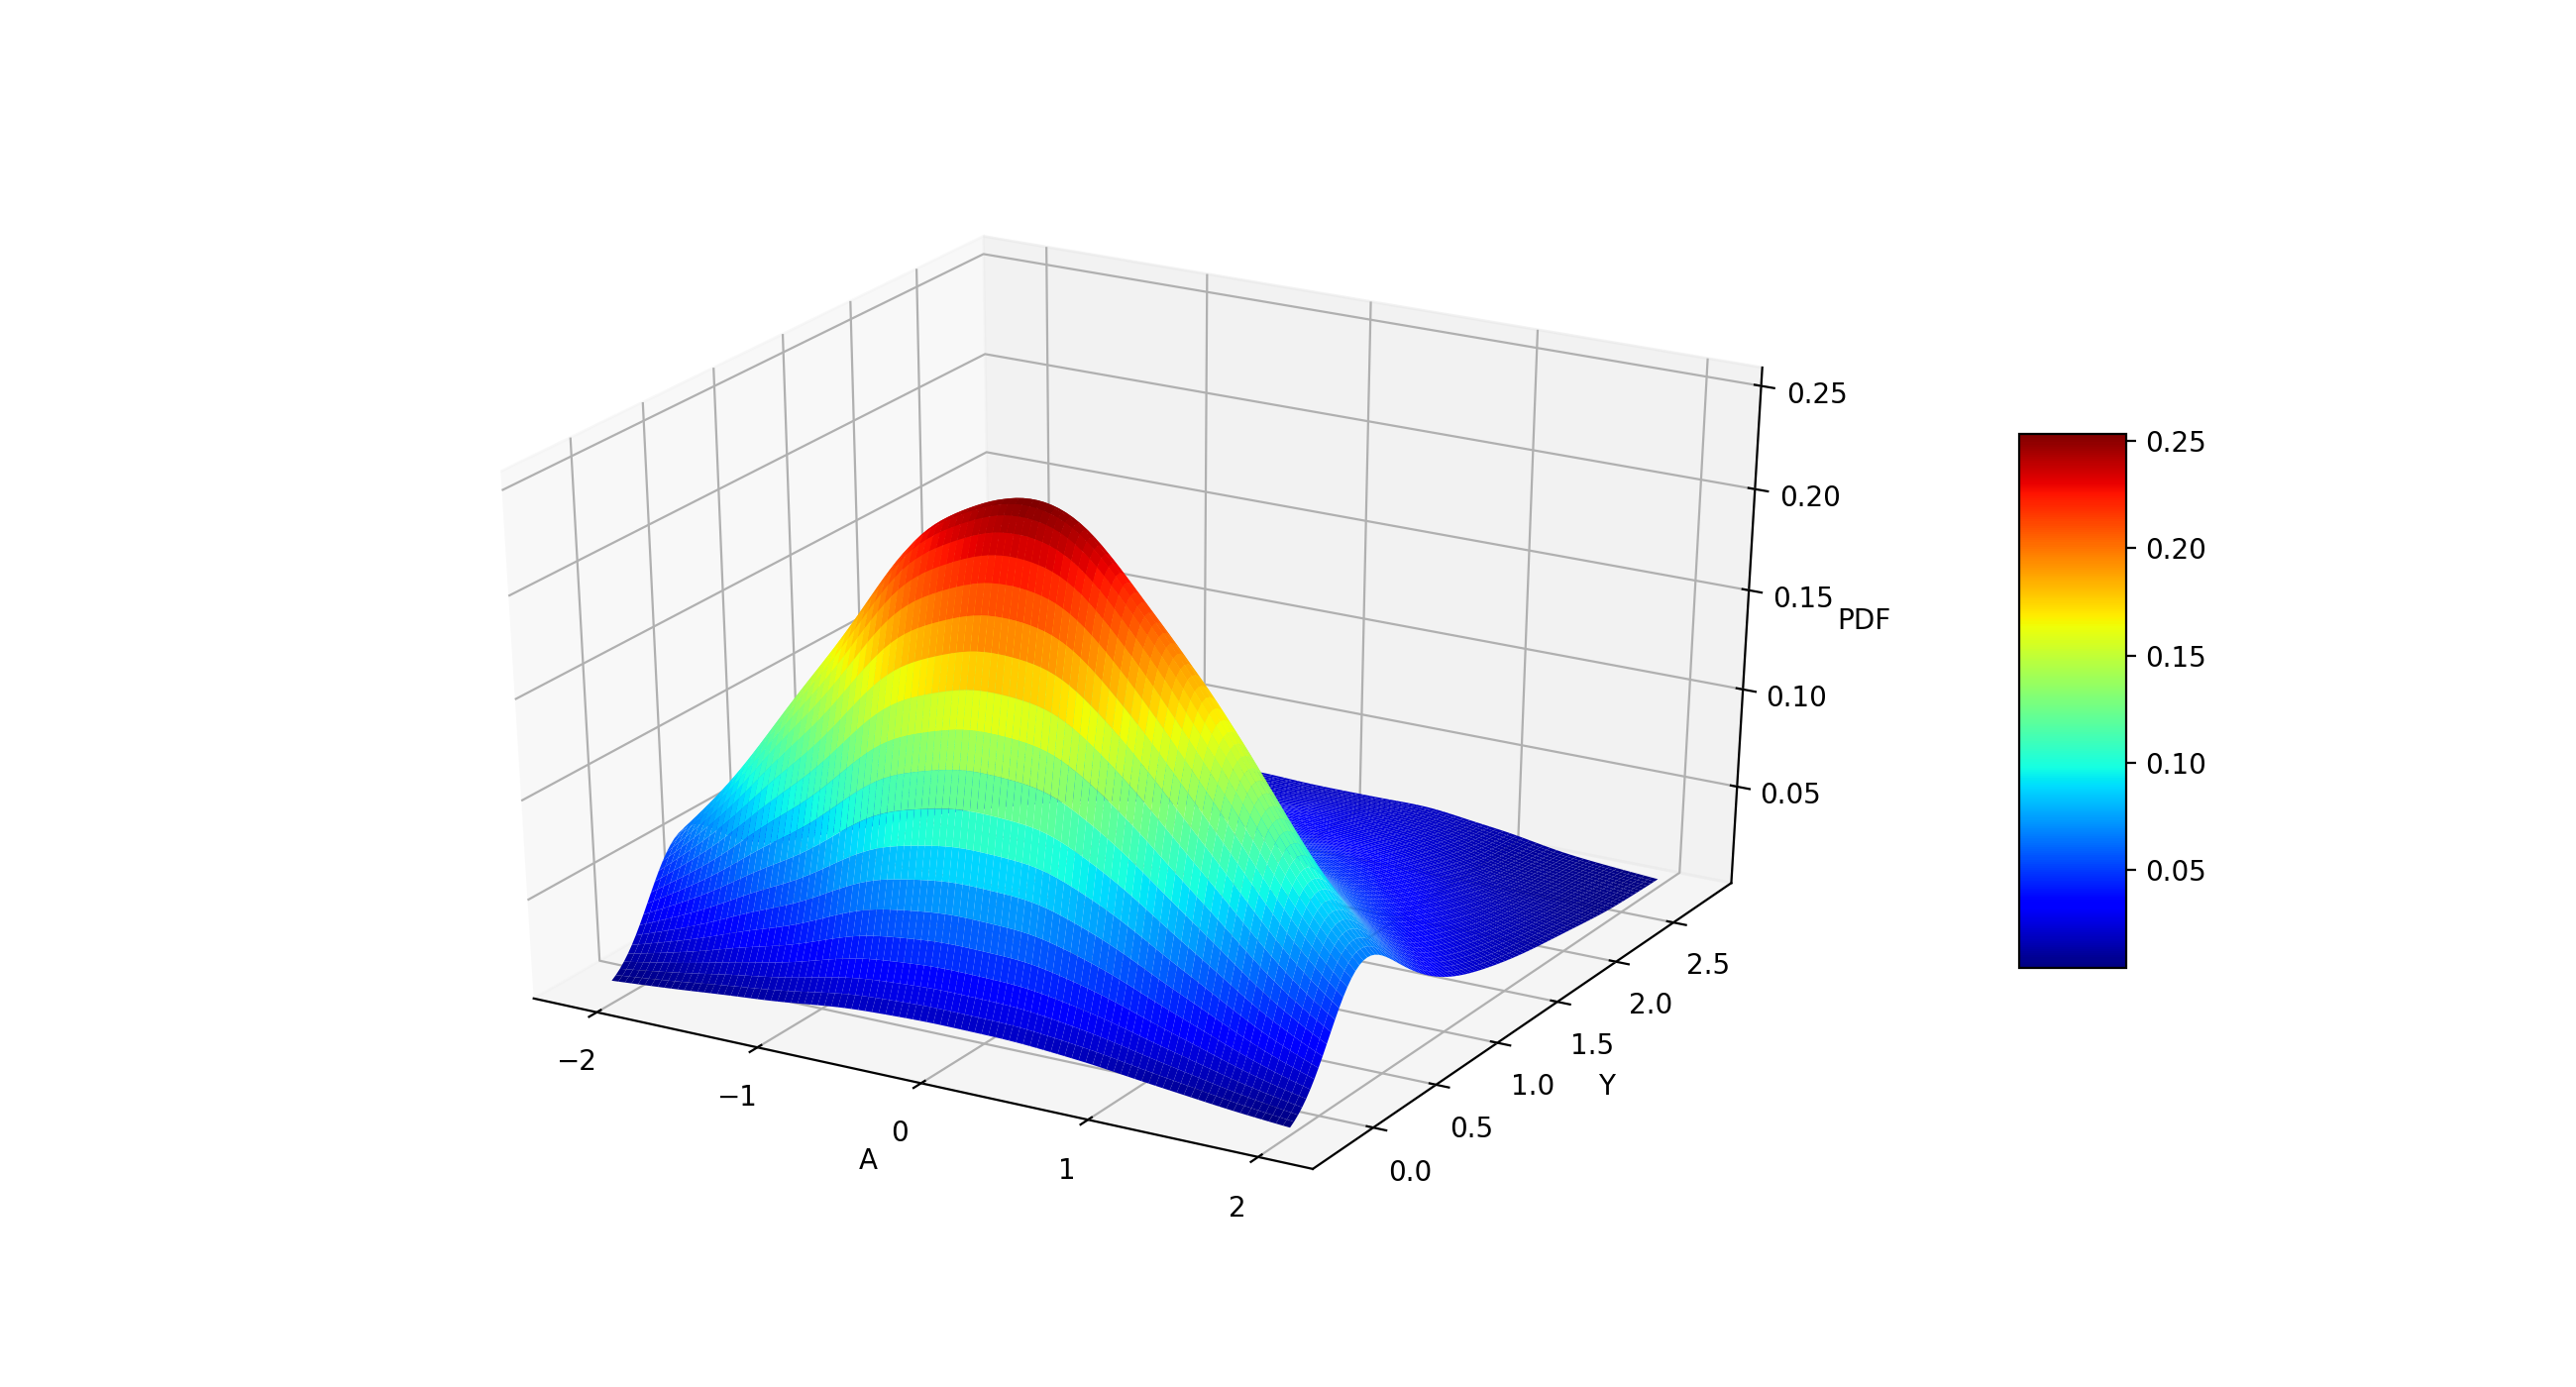

In [39]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

import scipy.stats as st
    

# Extract x and y
x = A
y = p1
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin/3:xmax/3:100j, ymin/8:ymax/8:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF

In [ ]:
hist, xedges, yedges = np.histogram2d(A, p1, density = True, bins=(points,points))#,range = [[-10,-9],[5,25]]) # you can change your bins, and the range on which to take data

xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) - (xedges[1]-xedges[0]) 

bin_area = np.array( [ [(x1 -x0)* (y1-y0) 
    for y1,y0 in zip(yedges[1:], yedges[:-1])] 
        for x1,x0 in zip(xedges[1:], xedges[:-1]) ] )

xpos = xpos.flatten()*1

ypos = ypos.flatten()*1
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]

#normalise histogram

dz = hist / hist.sum() / bin_area
dz = dz.flatten()

cmap = cm.get_cmap('jet')
max_height = np.max(dz)   
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average',)
plt.xlabel("A")
plt.ylabel("Y")
ax.azim = -30
ax.dist = 10
ax.elev = 30

plt.show()
sumZ = dx*dy*dz
print("Integral of Density",np.sum(sumZ))

# Gamma and Lognormal Joint Density

Values of a (a~1)
t= 1.5


<IPython.core.display.Javascript object>


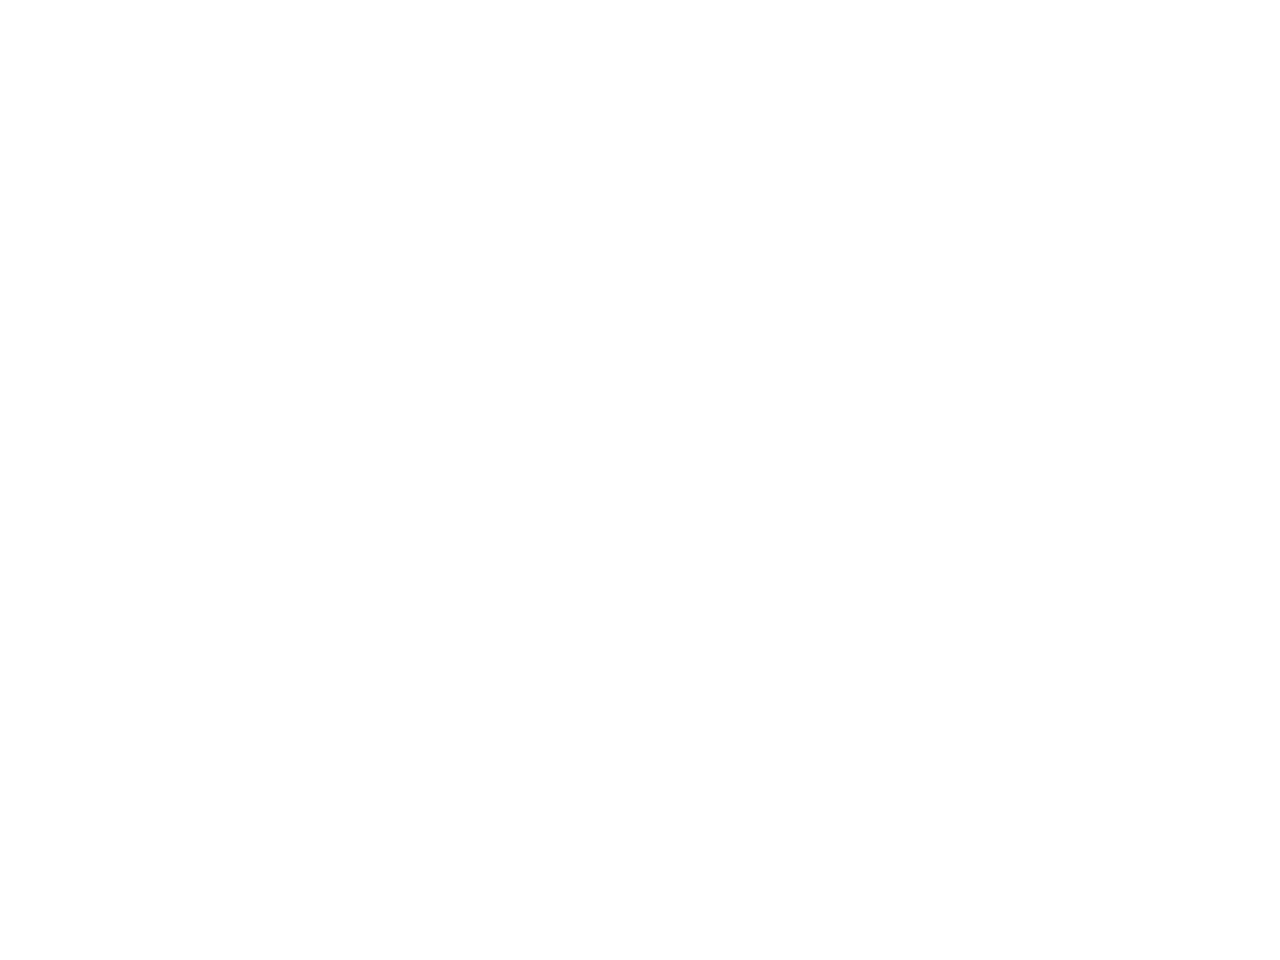

In [10]:
%matplotlib notebook
from math import gamma

def gammajoint(a,y):
    t = 1.5
    alpha = (2/15)*(t**2*(t + 4*a**2)/(t + 2*a**2))
    beta = (5/4) + (5*a**4)/(4*a**2*t + t**2)    
    f = ((math.e**(-(a**2)/(2*t))*(y**(beta-1))*(math.e**(-y/alpha))))/(((2*math.pi*t)**0.5)*(gamma(beta)*(alpha**beta)))
    return f

gammajoint = np.vectorize(gammajoint)

def lognormaljoint(a,y):
    t = 1.5
    ex = (t*a**2/3) + ((t**2)/6)
    var = (4*(a**2)*t**3 + t**4)
    sigma = (math.log(1 + var/(ex**2)))**0.5
    mu = -0.5*sigma**2 + math.log(var)
    
    f = (math.e**(-(a**2)/(2*t))*math.e**(-(-mu + math.log(y))**2 /(2*t*sigma**2)))/((2*math.pi*t)**0.5 * (y*sigma*(2*math.pi*t)**0.5))
    return f

lognormaljoint = np.vectorize(lognormaljoint)

A = np.linspace(-1.5,1.5,50)
Y = np.linspace(0.1,1.0,50)

A, Y = np.meshgrid(A,Y)

print("Values of a (a~1)")
print("t=",t)
fig = plt.figure()
ax = fig.gca(projection='3d')

c1 = ax.plot_surface(A,Y, Z=gammajoint(A,Y), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

c2 = ax.plot_surface(A,Y, Z=lognormaljoint(A,Y), rstride=1, cstride=1, cmap=cm.winter, linewidth=1, antialiased=True)
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
ax.set_zlim(0, 0.5)
plt.show()




# Gamma Density

Small values of a (a~0.5)
t= 1.5


<IPython.core.display.Javascript object>


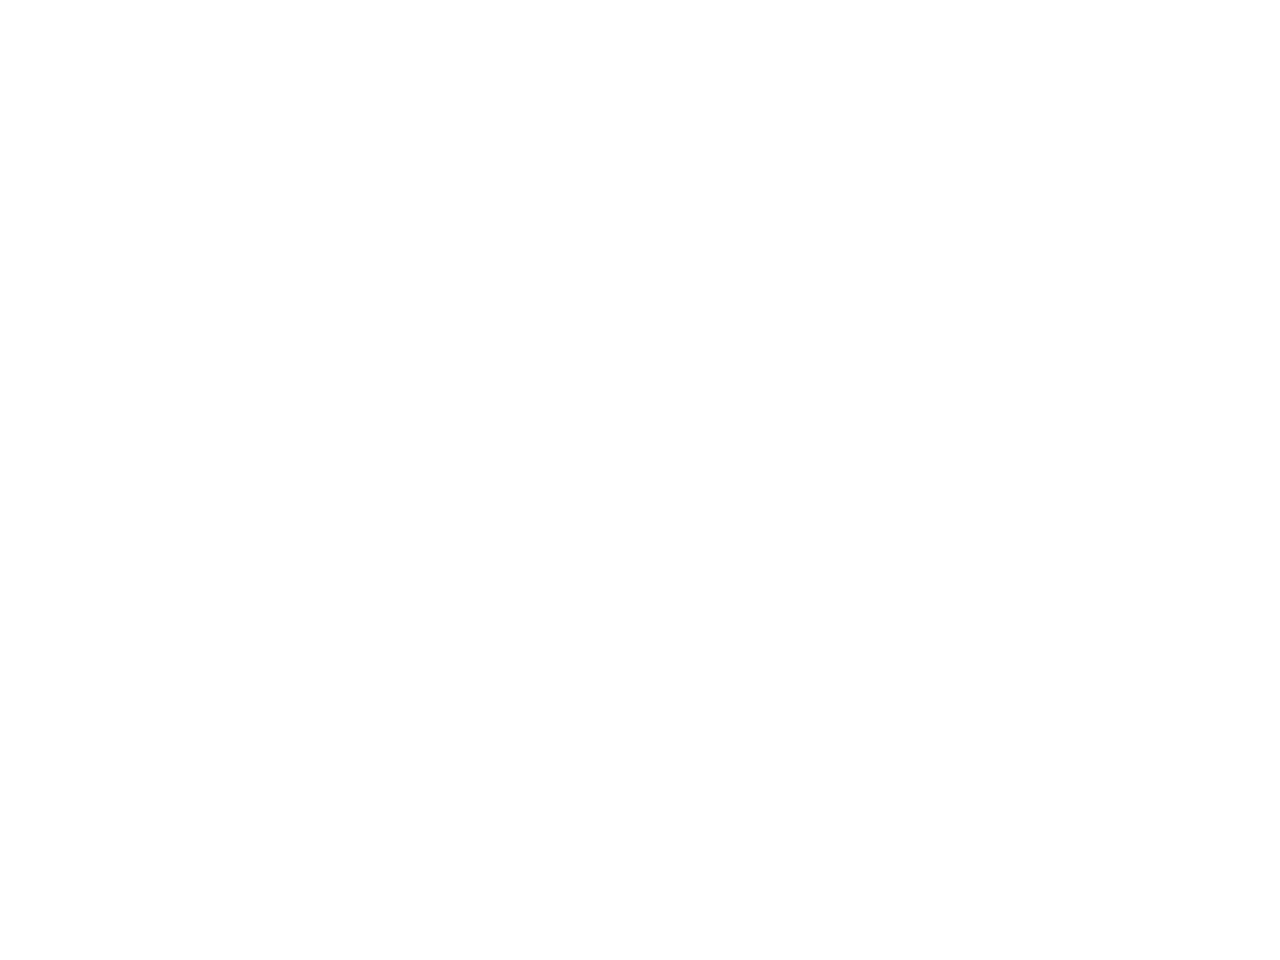

Large values of a (a~1)
t= 1.5


<IPython.core.display.Javascript object>


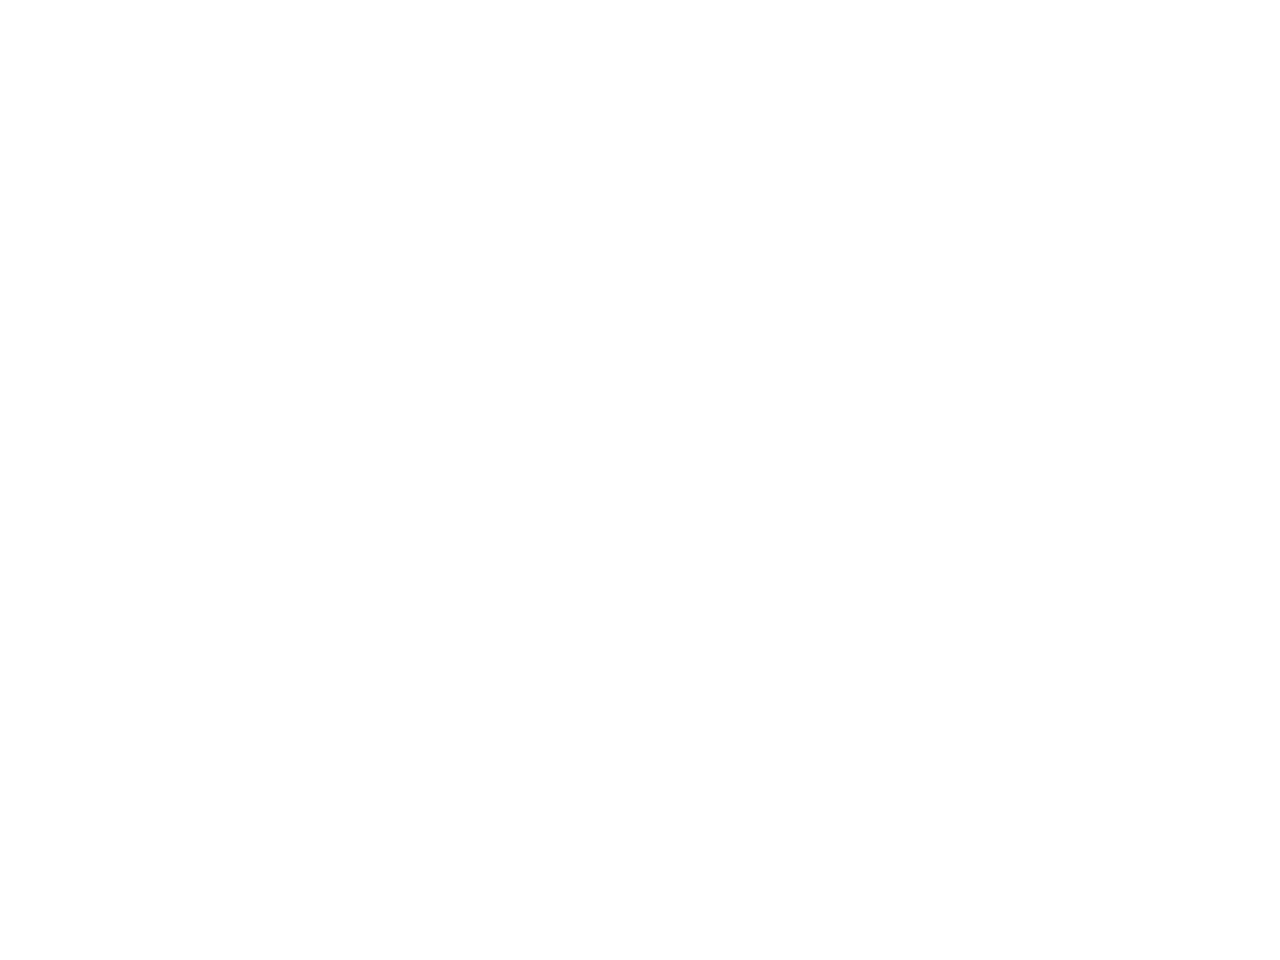

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

A = np.linspace(0.05,0.064,50)
Y = np.linspace(0,2,50)

A2 = np.linspace(1,1.05,30)
Y2 = np.linspace(0,2,30)

A, Y = np.meshgrid(A,Y)
A2, Y2 = np.meshgrid(A2,Y2)

def gammadensity(a,y):
    t = 1.5
    theta = (2/15)*(t**2*(t + 4*a**2)/(t + 2*a**2))
    v = (5/4) + (5*a**4)/(4*a**2*t + t**2)
    
    f = ((y**(v-1))*(math.e**(-y/theta)))/(v*(theta**v))*((math.e**(-a**2/(2*t)))/((2*math.pi*t)**0.5))
    return f

print("Small values of a (a~0.5)")
print("t=",t)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(A,Y, Z=gammadensity(A,Y), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
plt.show()

print("Large values of a (a~1)") 
print("t=",t)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(A2,Y2, Z=gammadensity(A2,Y2), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
plt.show()


# Exponent power polynomial

<IPython.core.display.Javascript object>


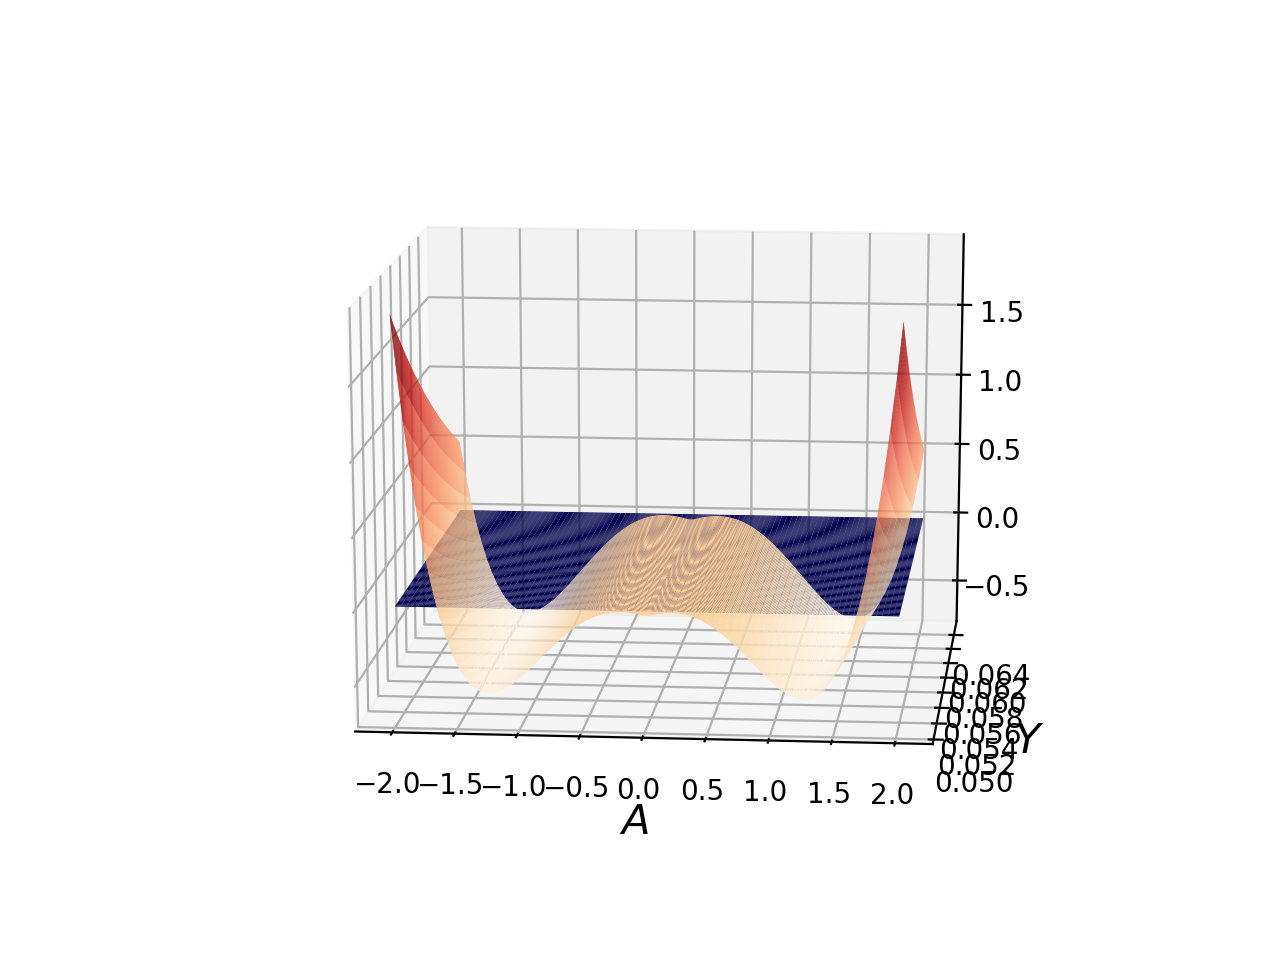

In [19]:
import math
from math import e
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

def f(w,y):
    f = ((-y*math.pi**2)/(2*e**2)) + ((math.pi*(2*y*w**2)**0.5)/(e**1.5)) - ((3*w**2)/(4*math.e)) - (((3+4*math.pi**2)*abs(w)**3)/(24*math.pi*(2*y*math.e)**0.5)) + ((-3 + 2*math.pi**2)*w**4/(48*y*math.pi**2))
    return f

def g(w,y):
    return (0*w + 0*y)

W2 = np.linspace(-2.005,2.005,90)
Y2 = np.linspace(0.0505,0.065,90)

W2, Y2 = np.meshgrid(W2, Y2)


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X=W2, Y=Y2, Z=f(W2,Y2), rstride=1, cstride=1, cmap=cm.OrRd, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

ax.plot_surface(X=W2, Y=Y2, Z=g(W2,Y2), rstride=1, cstride=1, cmap=cm.seismic, linewidth=1, antialiased=True) 

plt.show()


<IPython.core.display.Javascript object>


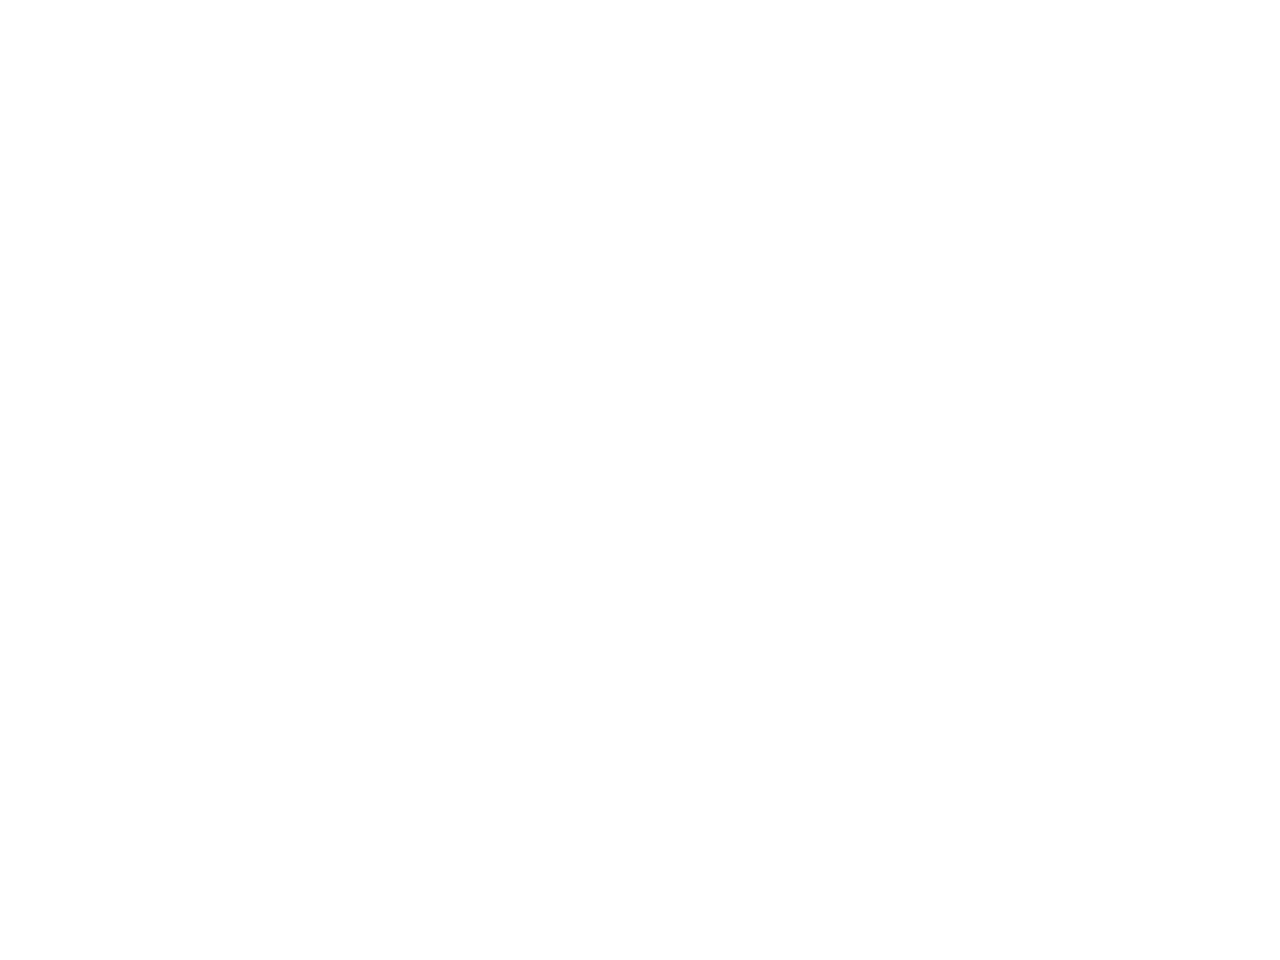

In [13]:
import math
from math import e
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

def f(w,y):
    f = np.exp(((-y*math.pi**2)/(2*e**2)) + ((math.pi*(2*y*w**2)**0.5)/(e**1.5)) - ((3*w**2)/(4*math.e)) - (((3+4*math.pi**2)*abs(w)**3)/(24*math.pi*(2*y*math.e)**0.5)) + ((-3 + 2*math.pi**2)*w**4/(48*y*math.pi**2)))
    return f

def g(w,y):
    return (0*w + 0*y)

W2 = np.linspace(-2.005,2.005,90)
Y2 = np.linspace(0.0505,0.065,90)

W2, Y2 = np.meshgrid(W2, Y2)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X=W2, Y=Y2, Z=f(W2,Y2), rstride=1, cstride=1, cmap=cm.OrRd, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

ax.plot_surface(X=W2, Y=Y2, Z=g(W2,Y2), rstride=1, cstride=1, cmap=cm.seismic, linewidth=1, antialiased=True) 

plt.show()



# Planar Quadratic Langevin Diffusion Density

In [1]:
def PQL(w,y):
    e = 1.5
    if w == 0:
        p = (math.sqrt(math.e)*2.15)/(math.sqrt(8*math.pi*y*e**3)) * np.exp(-(y*math.pi**2)/(2*e**2))+ w*0
    else: 
        p = (1/(8*y*e**3)**0.5)*np.exp(((-y*math.pi**2)/(2*e**2)) + ((math.pi*(2*y*w**2)**0.5)/(e**1.5)) - ((3*w**2)/(4*e)) - (((3+4*math.pi**2)*abs(w)**3)/(24*math.pi*(2*y*e)**0.5)) + ((-3 + 2*math.pi**2)*w**4/(48*y*math.pi**2)))
    return p

PQL = np.vectorize(PQL)

W = np.linspace(-1.8,1.8,80)
Y = np.linspace(0.005,0.0065,80)

W,Y = np.meshgrid(W,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X=W, Y=Y, Z=PQL(W,Y), rstride=1, cstride=1, cmap=cm.Wistia, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
ax.set_zlabel('$PDF$', fontsize=8)

plt.show()

NameError: name 'np' is not defined

Behaviour close to zero: 0.05<y<0.06 


<IPython.core.display.Javascript object>


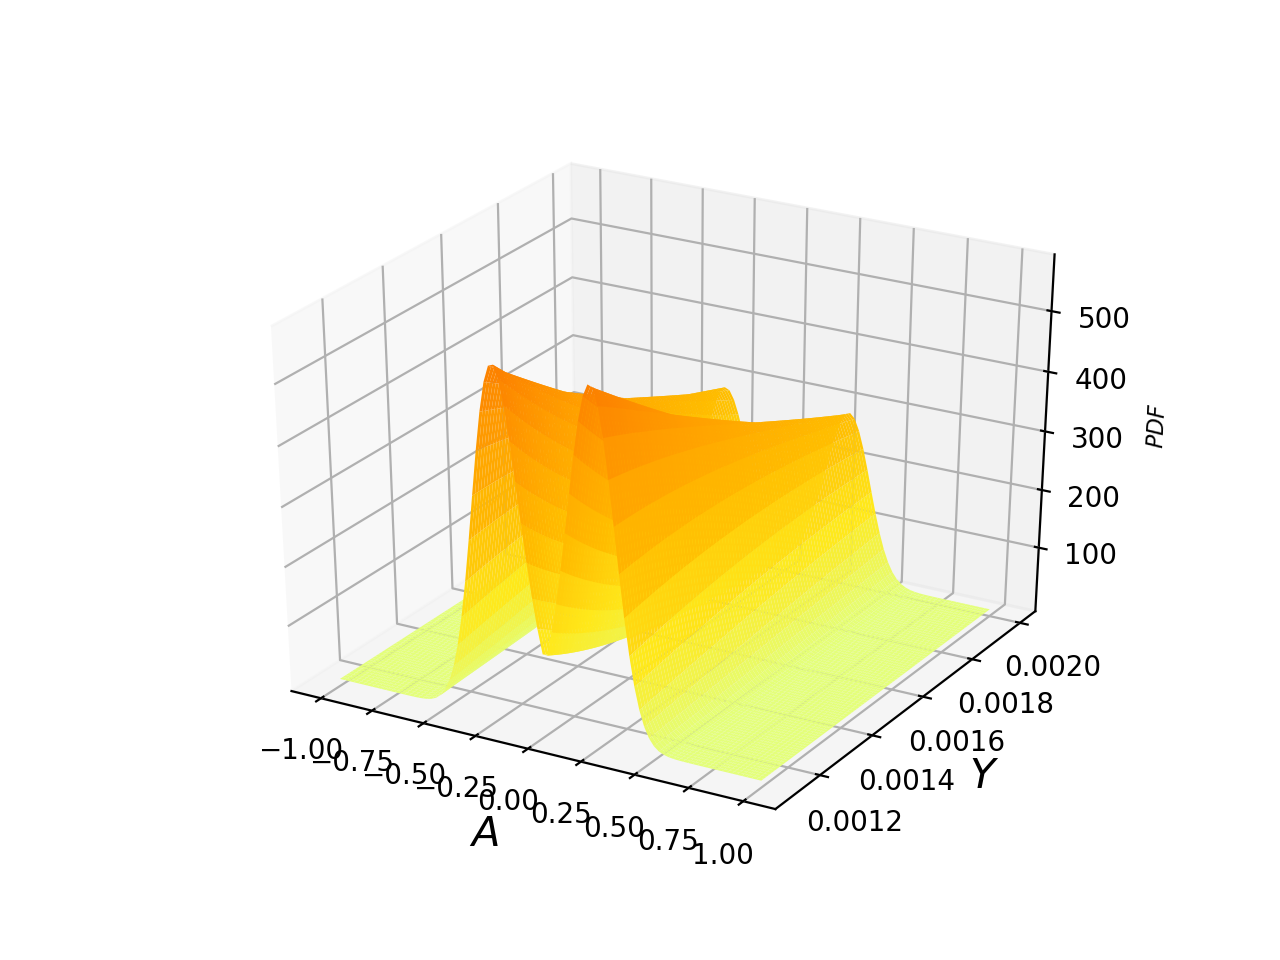

In [213]:
print("Behaviour close to zero: 0.05<y<0.06 ")
#print("epsilon =",2)

W2 = np.linspace(-1.0,1.0,90)
Y2 = np.linspace(0.0011,0.002,90)

W2, Y2 = np.meshgrid(W2, Y2)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X=W2, Y=Y2, Z=PQL(W2,Y2), rstride=1, cstride=1, cmap=cm.Wistia, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
ax.set_zlabel('$PDF$', fontsize=8)

plt.show()


<IPython.core.display.Javascript object>


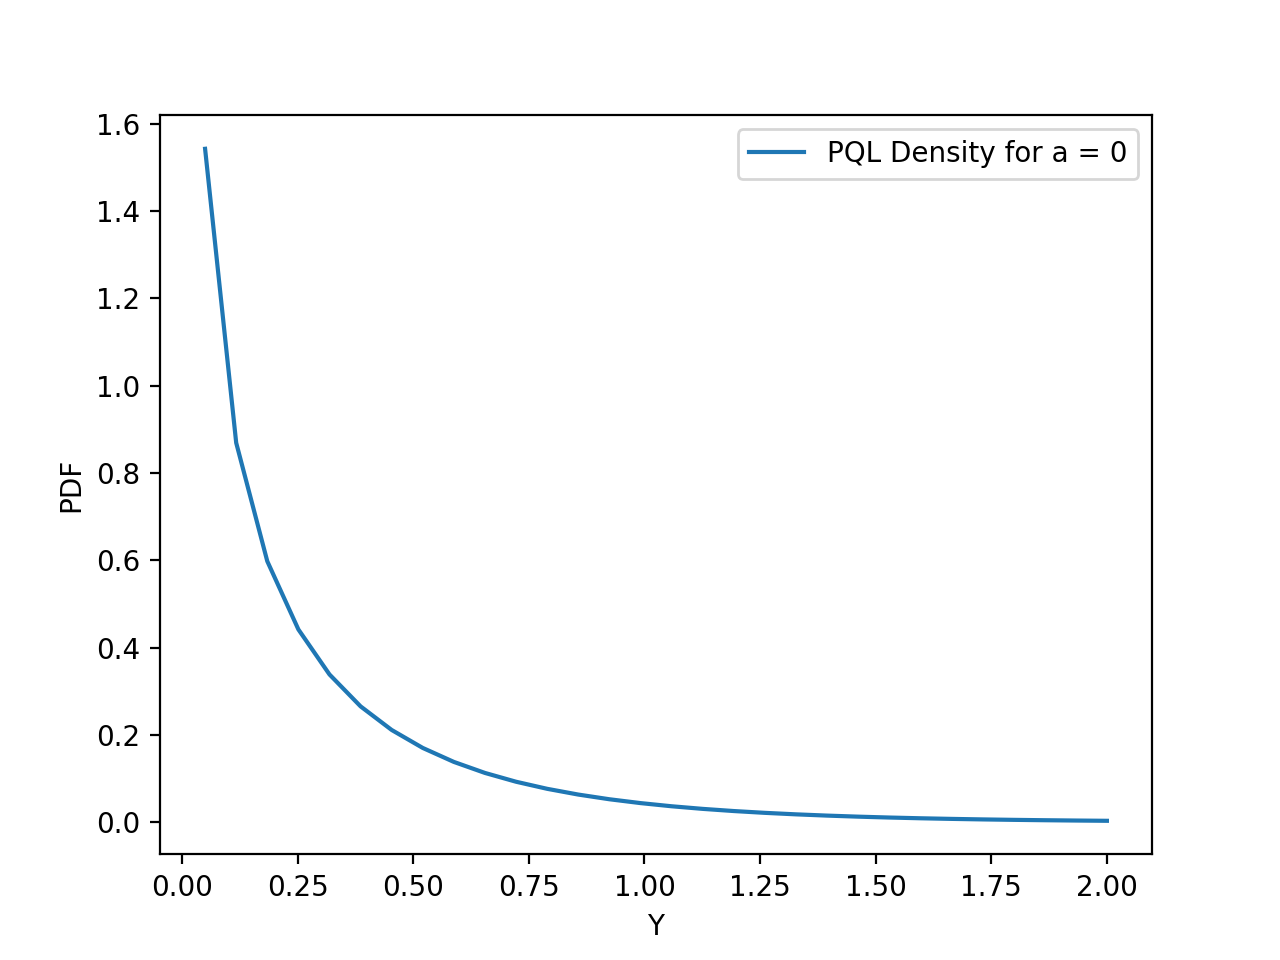

In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt

def pql(y):
    e = 1.5
    p = (math.sqrt(math.e)*2.15)/(math.sqrt(8*math.pi*y*e**3)) * np.exp(-(y*math.pi**2)/(2*e**2))
    return p

y = np.linspace(0.05,2,30)
pql = np.vectorize(pql)

plt.figure()
plt.plot(y,pql(y), label = 'PQL Density for a = 0')
plt.legend()
plt.xlabel("Y")
plt.ylabel("PDF")
plt.show()


# Numerical Integration along the Y axis

In [52]:
import sympy
from sympy import integrate, Symbol, exp, pi
from sympy.abc import y

w=Symbol('w')
e = 1.5
f=(1/(8*y*e**3)**0.5)*exp(((-y*sympy.pi**2)/(2*e**2)) + ((sympy.pi*(2*y*w**2)**0.5)/(e**1.5)) - ((3*w**2)/(4*e)) - (((3+4*sympy.pi**2)*abs(w)**3)/(24*pi*(2*y*e)**0.5)) + ((-3 + 2*sympy.pi**2)*w**4/(48*y*sympy.pi**2)))
integrate(f, (y, 0.001,0.5))



0.192450089729875*exp(-0.5*w**2)*Integral(y**(-0.5)*exp(-0.222222222222222*pi**2*y)*exp(w**4/(24*y))*exp(-w**4/(16*pi**2*y))*exp(-0.0721687836487032*y**(-0.5)*Abs(w)**3/pi)*exp(-0.0962250448649376*pi*y**(-0.5)*Abs(w)**3)*exp(0.769800358919501*pi*y**0.5*(w**2)**0.5), (y, 0.001, 0.5))

# Marginal Density of PQL

<IPython.core.display.Javascript object>


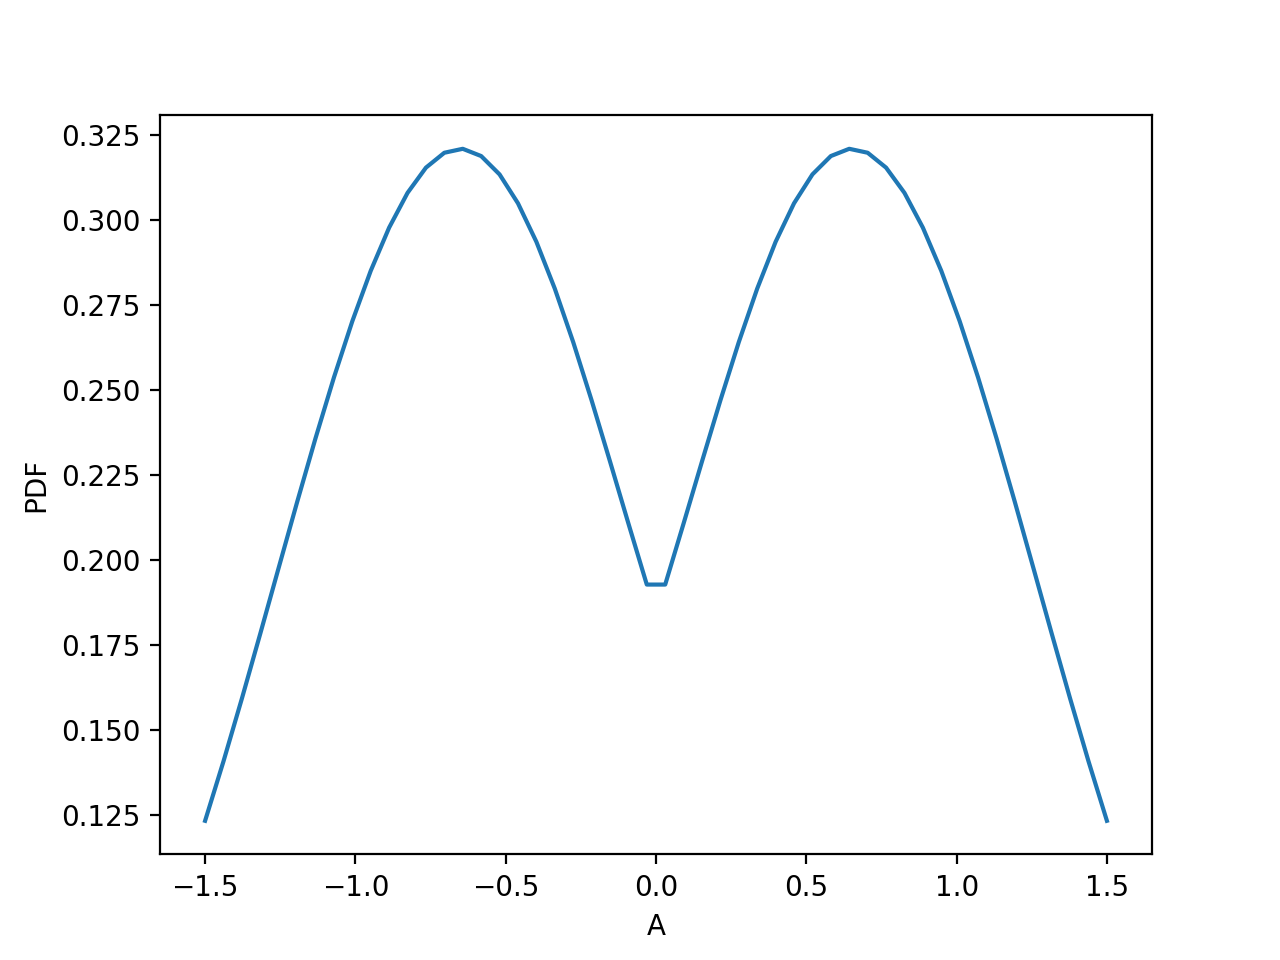

Text(0,0.5,'PDF')

In [83]:
import scipy
import sympy
from sympy import integrate, Symbol, exp, pi
from sympy.abc import y
from sympy.utilities.lambdify import lambdify

def integral_as_quad(expr, lims):
    var, a, b = lims
    return scipy.integrate.quad(lambdify(var, expr), a, b)[0]

w=Symbol('w')
e = 1
f=(1/(8*y*e**3)**0.5)*exp(((-y*sympy.pi**2)/(2*e**2)) + ((sympy.pi*(2*y*w**2)**0.5)/(e**1.5)) - ((3*w**2)/(4*e)) - (((3+4*sympy.pi**2)*abs(w)**3)/(24*pi*(2*y*e)**0.5)) + ((-3 + 2*sympy.pi**2)*w**4/(48*y*sympy.pi**2)))
integrate(f, (y, 0.02,0.8))

fx = lambdify((w),integrate(f, (y, 0.02,0.8)),modules=[{"Integral": integral_as_quad}, "sympy"])

farr = []
w = np.linspace(-1.50,1.50,50)
for x in w:
    farr.append(fx(x))
    
farr = np.array(farr)    
plt.figure()
plt.plot(w,farr, label = "Marginal density of PQL: p(A)")
plt.xlabel("A")
plt.ylabel("PDF")



# Conditional Density of PQL

<IPython.core.display.Javascript object>


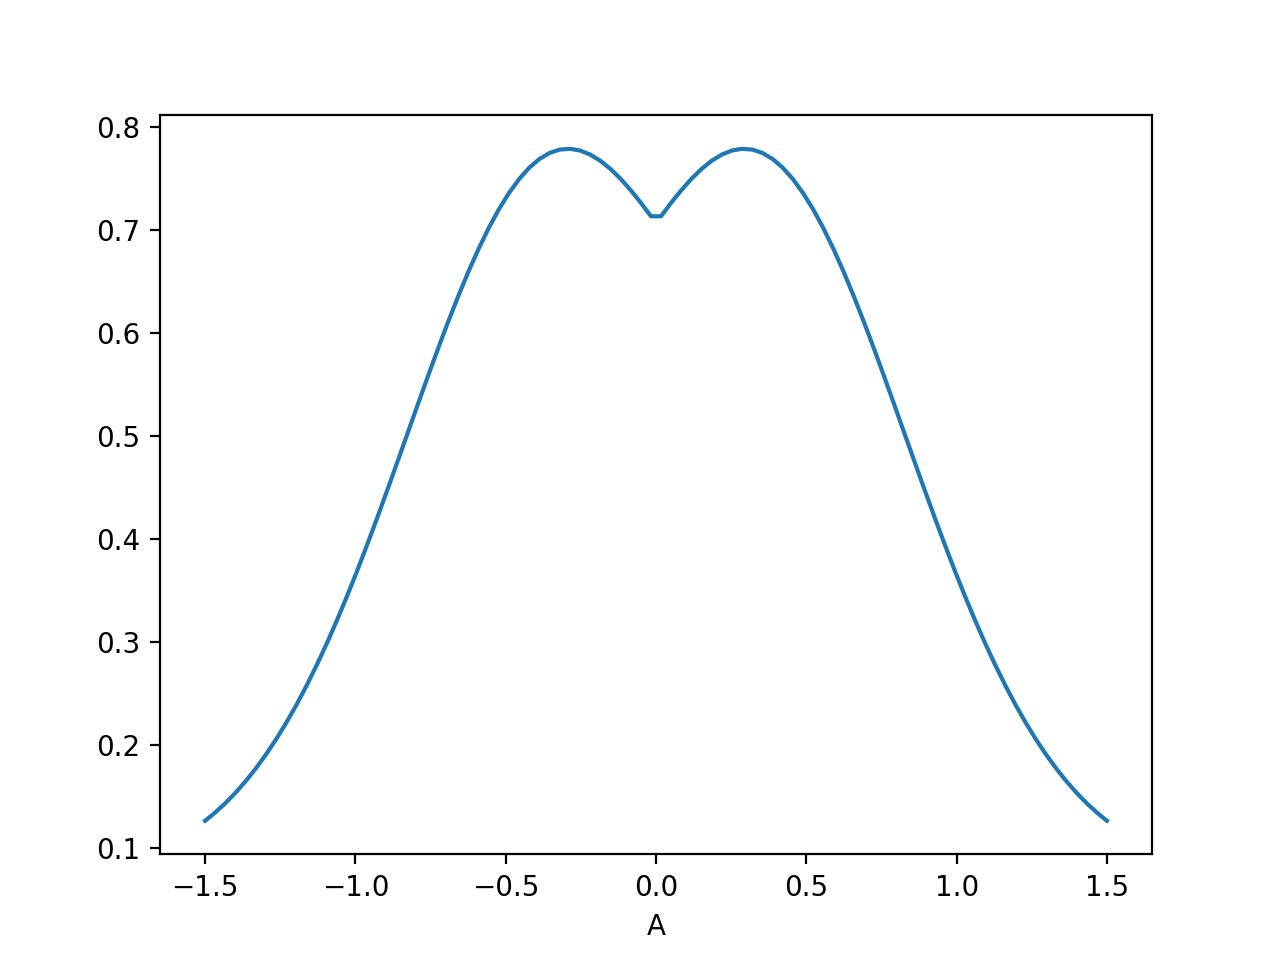

Text(0.5,0,'A')

In [33]:
plt.figure()
WW = np.linspace(-1.5,1.5,90)
plt.plot(WW, PlanarLangevin(WW,0.0576))
#ax.autoscale()
#plt.ylim(0.25, 0.31)
plt.show()
plt.xlabel("A")

<IPython.core.display.Javascript object>


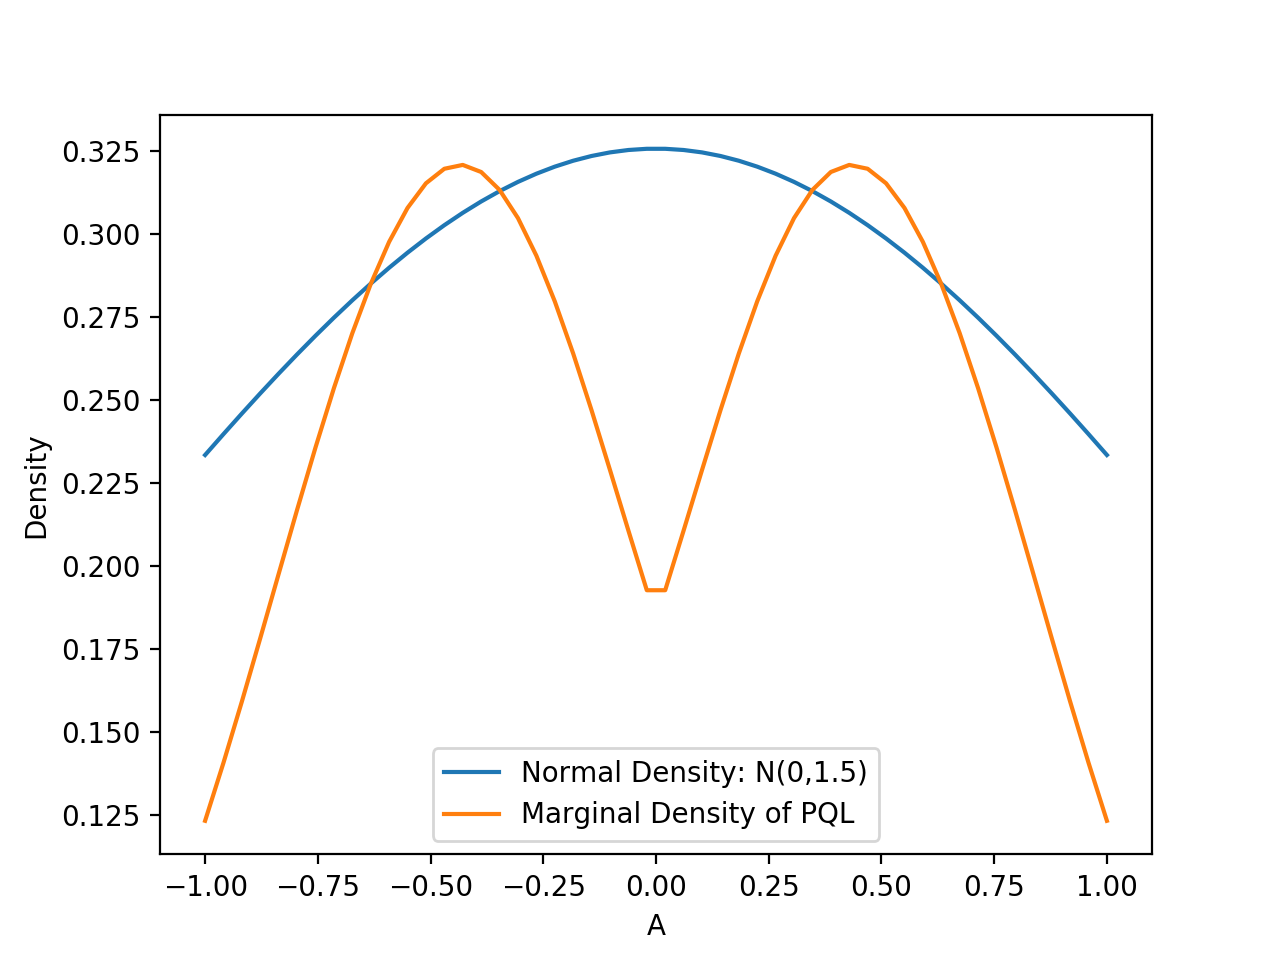

KstestResult(statistic=0.5400460739001165, pvalue=3.5404731917090926e-14)


In [89]:
import math
import numpy as np
import scipy
from scipy import stats
from scipy.integrate import quad
import mpmath as mp
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import kstest



farr = np.array(farr)

plt.figure()
x = np.linspace(-1,1,50)
plt.plot(x,norm.pdf(x,0,1.5**0.5),label = 'Normal Density: N(0,1.5)')
plt.plot(x, farr,label="Marginal Density of PQL")
plt.show()
plt.xlabel('A')
plt.ylabel('Density')
plt.legend()


farr=farr.astype('float64')
#print(farr.dtype)
#print(np.isnan(farr))

ks = kstest(farr,"norm",args = (0,1.5**0.5))
print(ks)

    

# Comparison: Gamma Density & Planar langevin

Coolwarm: Gamma Joint Density
yellow: PQL Density
t= 0.05


<IPython.core.display.Javascript object>


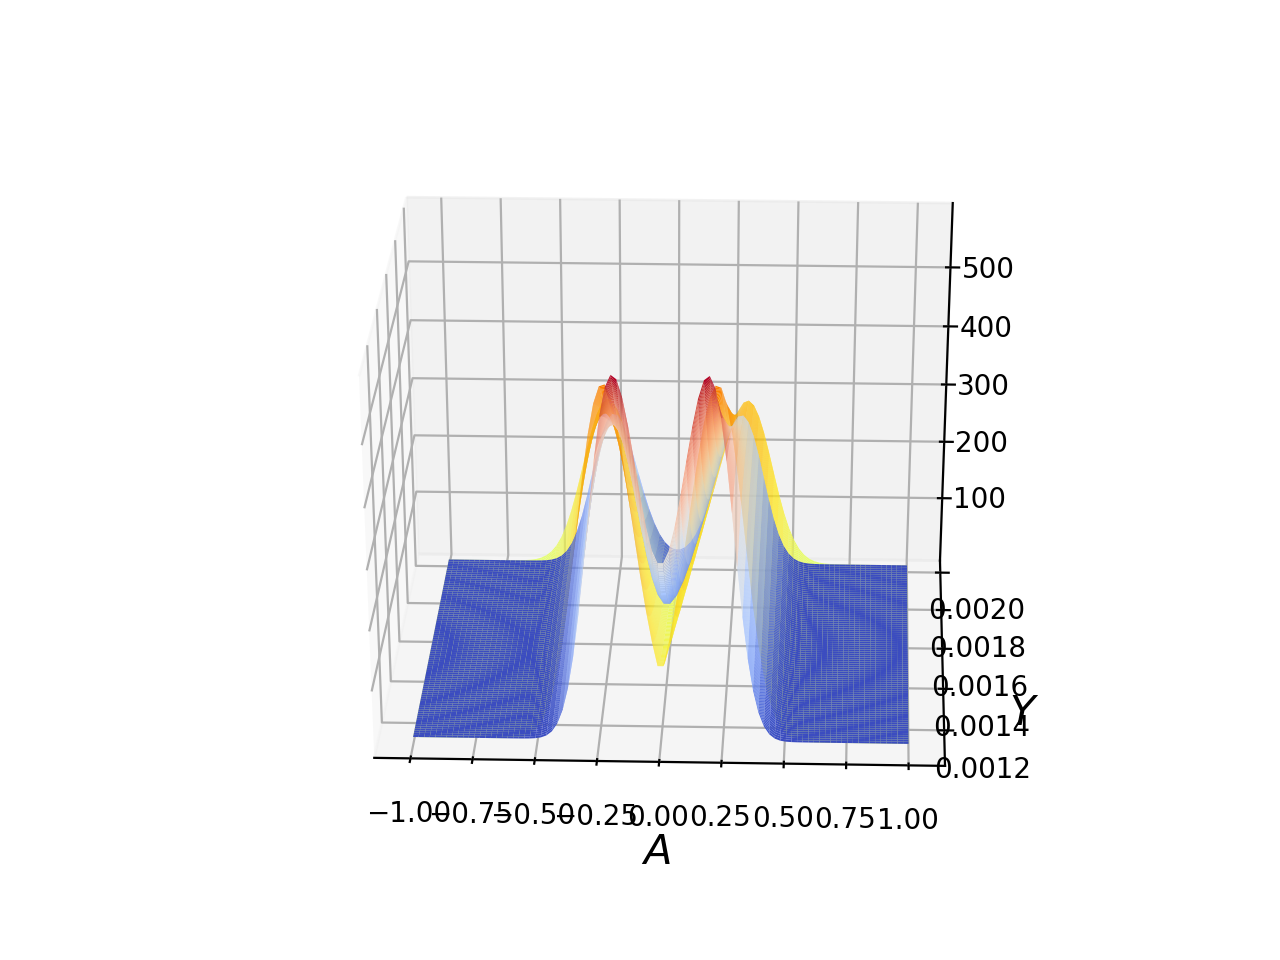

In [214]:
%matplotlib notebook
print("Coolwarm: Gamma Joint Density")
print("yellow: PQL Density")
from scipy.stats import gamma
import math

#wc = np.linspace()
t = 0.05
def gammajoint(a,y):
    t = 0.05
    alpha = (2/15)*(t**2*(t + 4*a**2)/(t + 2*a**2))
    beta = (5/4) + (5*a**4)/(4*a**2*t + t**2)    
    f = ((math.e**(-(a**2)/(2*t))*(y**(beta-1))*(math.e**(-y/alpha))))/(((2*math.pi*t)**0.5)*(math.gamma(beta)*(alpha**beta)))
    return f

gammajoint = np.vectorize(gammajoint)
print("t=",t)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(W2,Y2, Z=gammajoint(W2,Y2), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.plot_surface(X=W2, Y=Y2, Z=PQL(W2,Y2), rstride=1, cstride=1, cmap=cm.Wistia, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.show()





# Comparison: Gamma Density, Log-normal Density & Planar Quadratic Langevin Diffusion Density

coolwarm: gamma joint density
blue: lognormal joint density
yellow: PQL density
t= 0.05


<IPython.core.display.Javascript object>


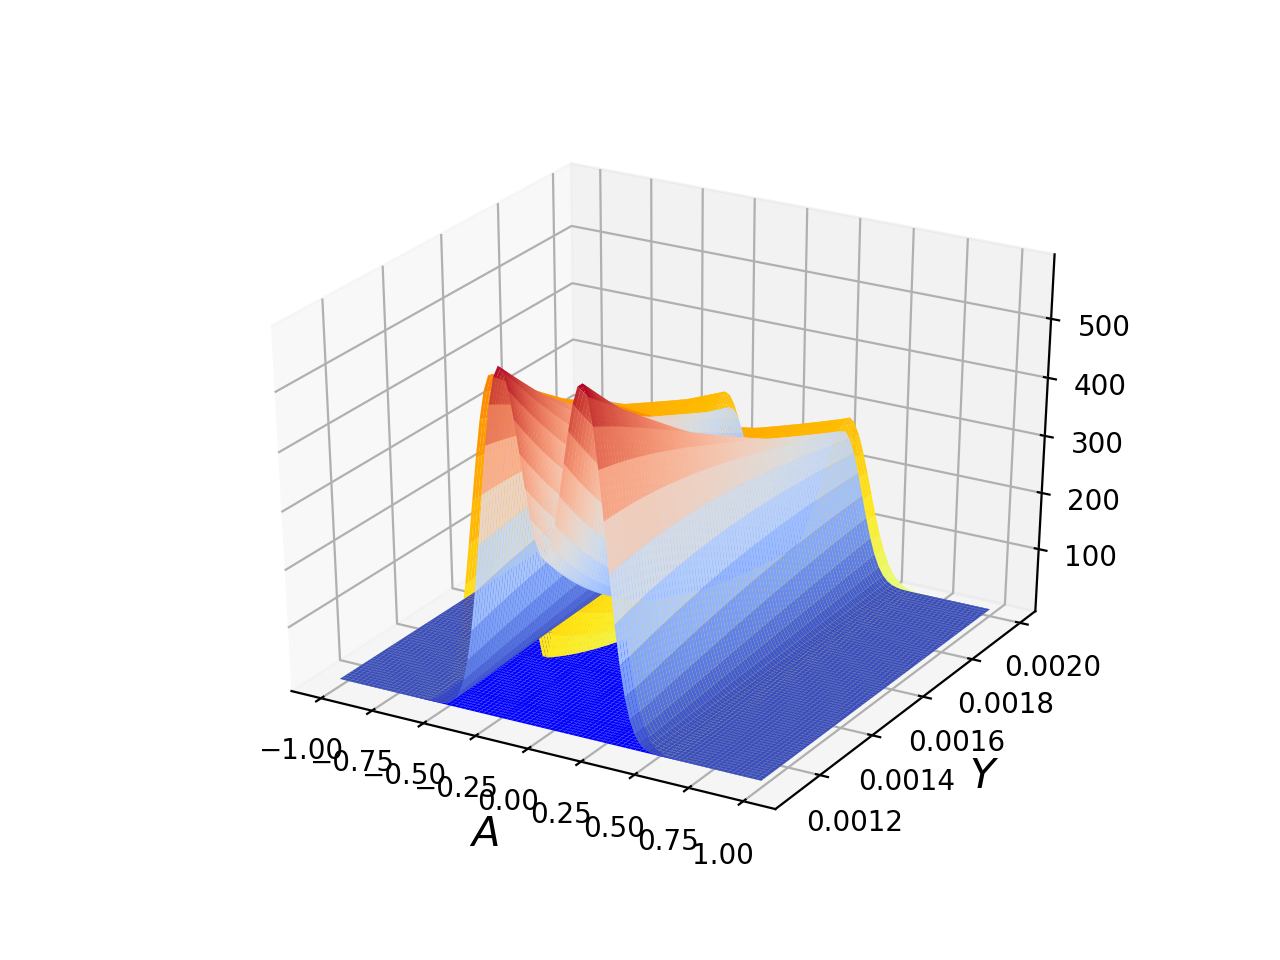

Text(0.5,0,'$Y$')

In [215]:
def lognormaljoint(a,y):
    t = 0.05
    ex = (t*a**2/3) + ((t**2)/6)
    var = (4*(a**2)*t**3 + t**4)
    sigma = (math.log(1 + var/(ex**2)))**0.5
    mu = -0.5*sigma**2 + math.log(var)
    
    f = (math.e**(-(a**2)/(2*t))*math.e**(-(-mu + math.log(y))**2 /(2*t*sigma**2)))/((2*math.pi*t)**0.5 * (y*sigma*(2*math.pi*t)**0.5))
    return f

lognormaljoint = np.vectorize(lognormaljoint)

print("coolwarm: gamma joint density")
print("blue: lognormal joint density")
print("yellow: PQL density")
print("t=",t)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(W2,Y2, Z=gammajoint(W2,Y2), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.plot_surface(W2,Y2, Z=lognormaljoint(W2,Y2), rstride=1, cstride=1, cmap=cm.winter, linewidth=1, antialiased=True)
ax.plot_surface(X=W2, Y=Y2, Z=PQL(W2,Y2), rstride=1, cstride=1, cmap=cm.Wistia, linewidth=1, antialiased=True)  
ax.set_xlabel('$A$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

# Compare Gamma Joint Density, Log-normal joint density, Planar Quadratic Langevin Diffusion Density & Kernel Density

In [188]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

import scipy.stats as st

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

points = 100
trials = 60000
n = 100
t = 0.05

A = np.zeros(trials)
p1 = np.zeros(trials)

def brownsum(t,n):
    Bs = np.zeros(n)
    ds = t/n
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1] + sign*np.sqrt(ds)
    p1 = np.dot(Bs,Bs.T)*ds
    #print(Bs)
    return Bs, p1

for i in range(trials):
    A[i] = brownsum(t,n)[0][n-1]
    p1[i] = brownsum(t,n)[1]
    

x = A
y = p1
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin/3:xmax/3:100j, ymin/8:ymax/8:100j]
#xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


<IPython.core.display.Javascript object>


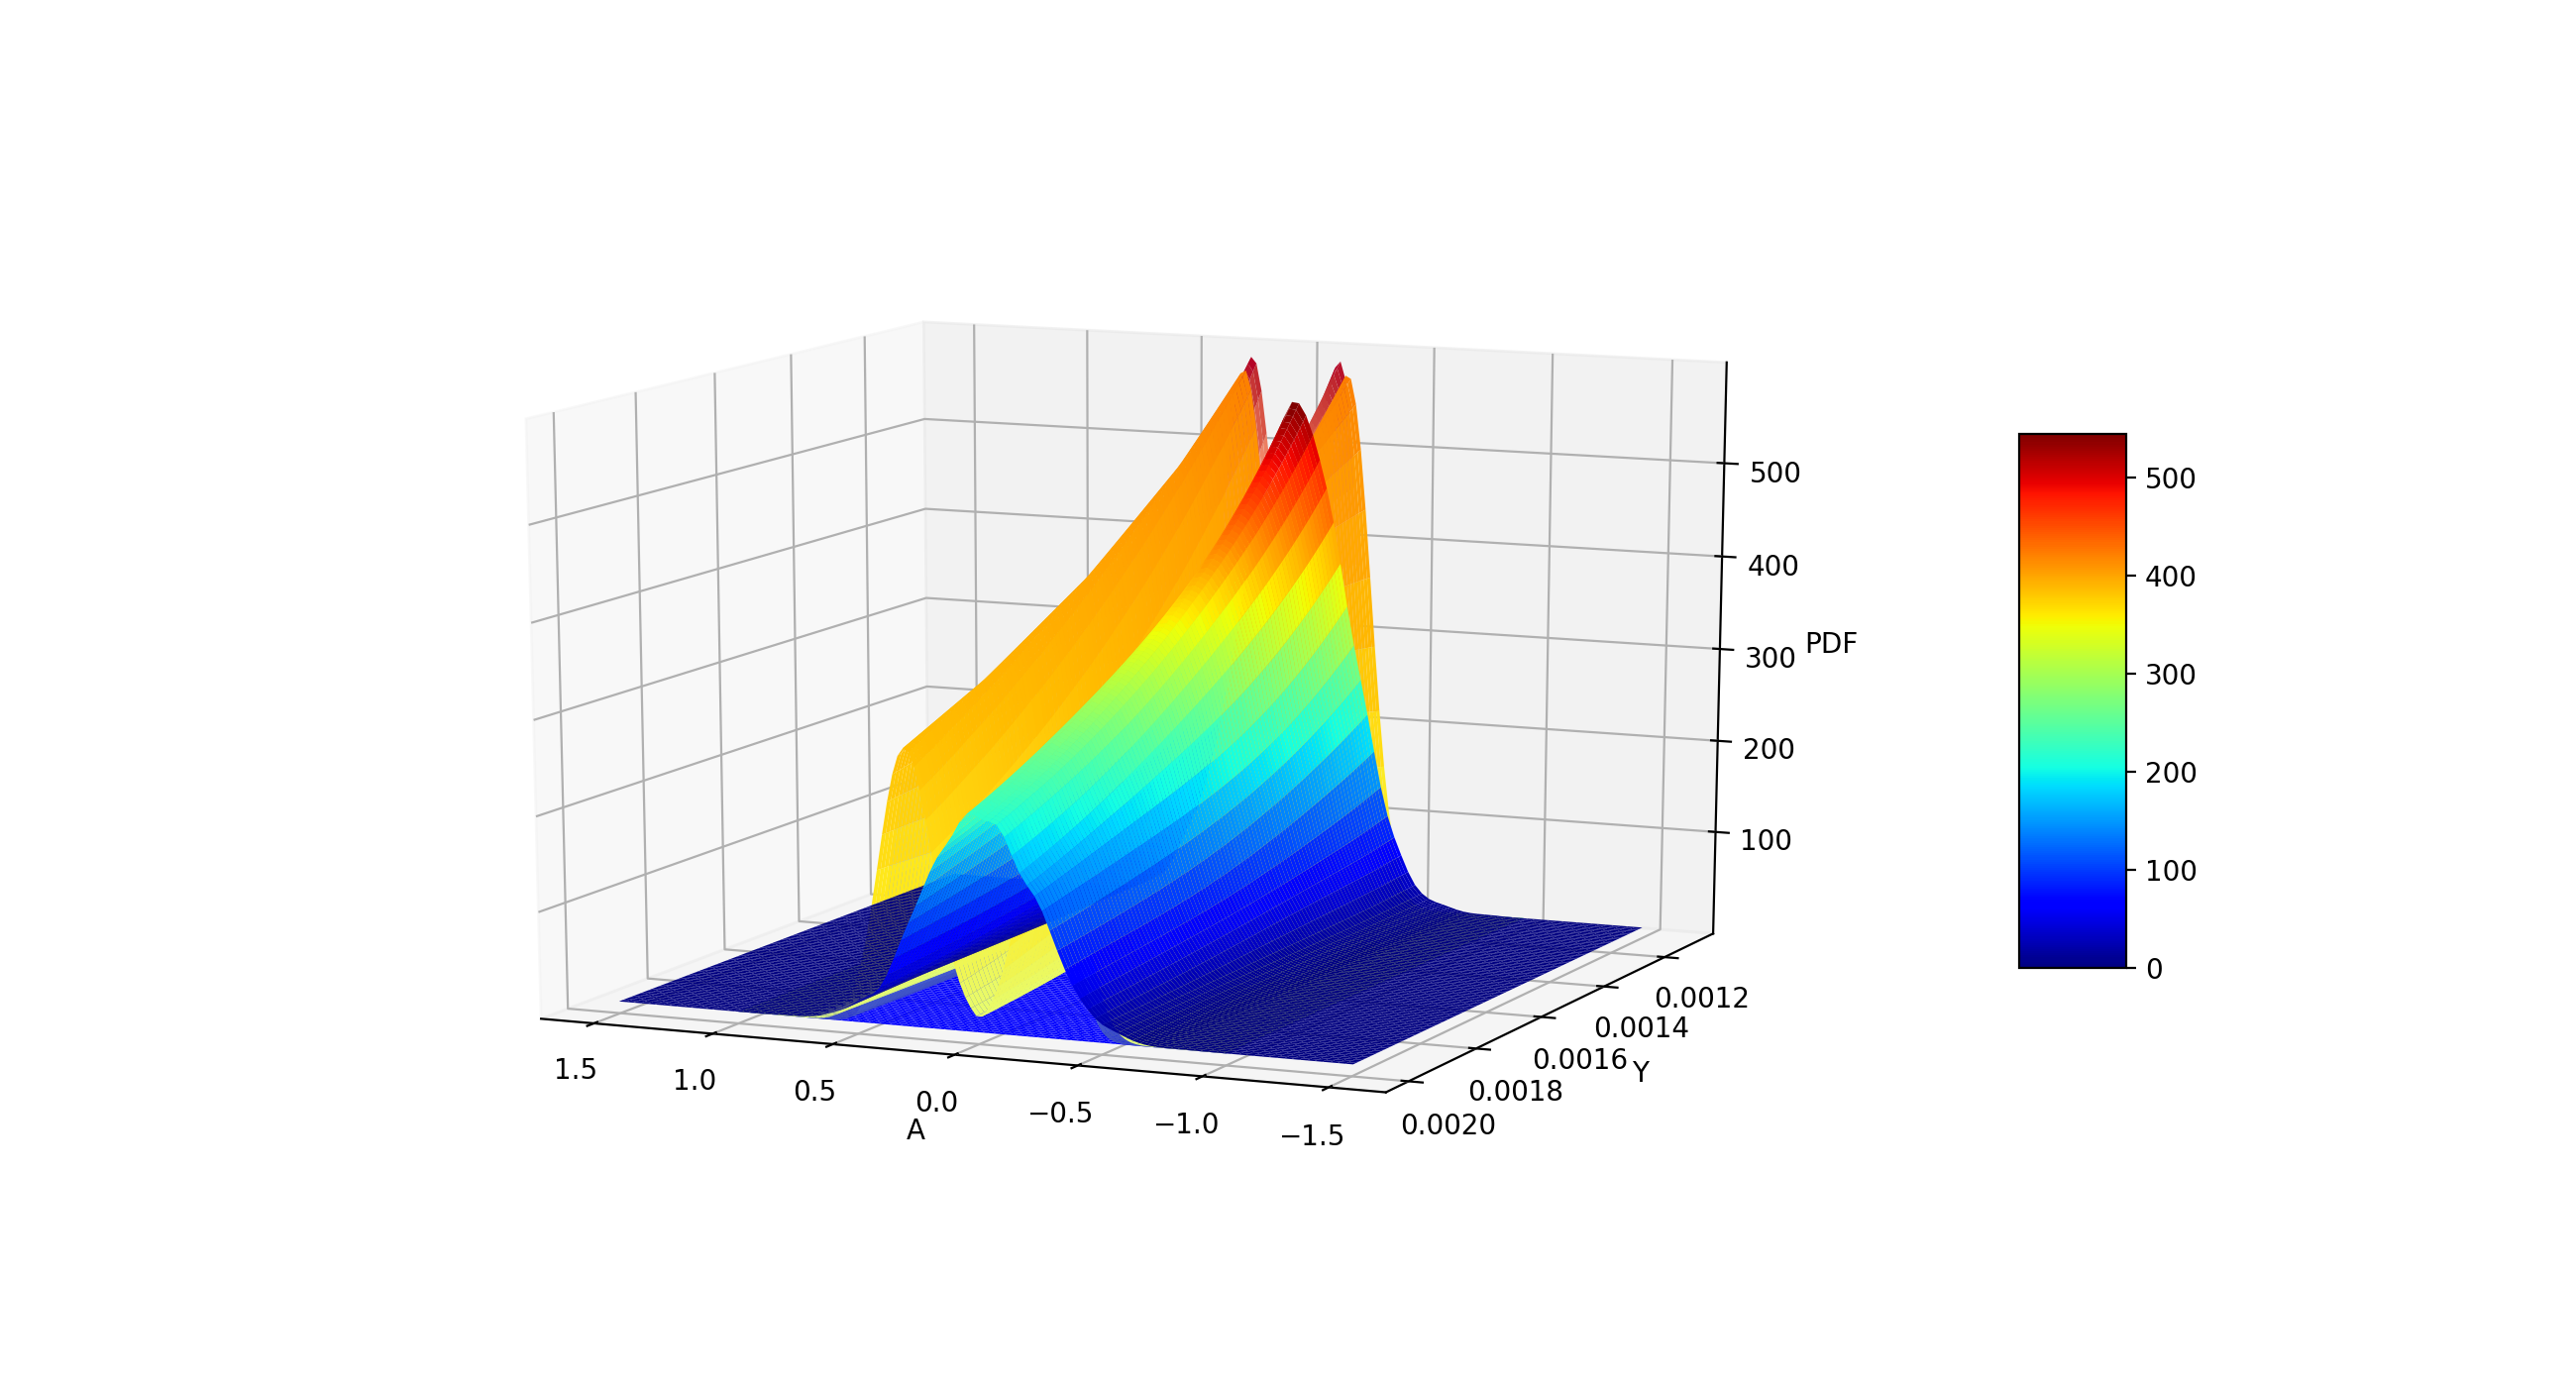

In [218]:
# Extract x and y
x = A
y = p1


# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
a1 = -1.505
a2 = 1.505
y1 = 0.0011
y2 = 0.002
#xx, yy = np.mgrid[xmin/3:xmax/3:100j, ymin/8:ymax/8:100j]

xx, yy = np.mgrid[a1:a2:100j, y1:y2:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.plot_surface(W2,Y2, Z=gammajoint(W2,Y2), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)
surf2 = ax.plot_surface(X=W2, Y=Y2, Z=PQL(W2,Y2), rstride=1, cstride=1, cmap=cm.Wistia, linewidth=1, antialiased=True)  
ax.plot_surface(W2,Y2, Z=lognormaljoint(W2,Y2), rstride=1, cstride=1, cmap=cm.winter, linewidth=1, antialiased=True)
ax.set_xlabel('A')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
#ax.set_ylim(0,3)
#ax.set_title('Kernel density estimation')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
#fig.colorbar(surf2, shrink=0.5, aspect=5)
ax.view_init(5, 95)